<a href="https://www.kaggle.com/code/rupanshirana/titanic-logistic-regression?scriptVersionId=122817149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### Problem:
This project is about the Titanic disaster of 1912. The goal of this project is to predict which passengers survived the disaster based on a set of features such as age, sex, fare, and cabin class. We are going to create a Logistic Regression machine learning model that can accurately predict the survival outcome for each passenger.

#### Dataset:
##### Dataset columns are as follows:

- Survival - Survival (0 = No, 1 = Yes)
- Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex - male,female
- Age - Age in years
- Sibsp - Number of siblings or spouses aboard the Titanic
- Parch - Number of parents or children aboard the Titanic
- Ticket - Ticket number
- Fare - Passenger fare
- Cabin - Cabin number
- Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Let's get started

#### Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve



pd.set_option('display.max_columns', 100)

#### Loading train data set

In [3]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Checking shape of data

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


#### Checking column types

In [6]:
print("train---------------",train.dtypes)
print("test----------------",test.dtypes)

train--------------- PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
test---------------- PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Basic information

In [7]:
print("train----------------------",train.info())
print("test-----------------------",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train---------------------- None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 

- from this we know, age, cabin and embarked have missing values

#### Checking missing values

In [8]:
print("train missing values---------------",train.isnull().sum())
print("test missing values----------------",test.isnull().sum())

train missing values--------------- PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test missing values---------------- PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Checking missing % of train

In [9]:
for i in train.columns:
    if train[i].isnull().any():
        print(i,"----",train[i].isnull().sum()/train.shape[0]*100)

Age ---- 19.865319865319865
Cabin ---- 77.10437710437711
Embarked ---- 0.22446689113355783


#### Checking missing % of test

In [10]:
for i in test.columns:
    if test[i].isnull().any():
        print(i,"----",test[i].isnull().sum()/test.shape[0]*100)

Age ---- 20.574162679425836
Fare ---- 0.23923444976076555
Cabin ---- 78.22966507177034


#### Conclusion:
- The Training dataset has information about 891 passengers of the Titanic disaster.
- We have 12 variables including 11 independent variables and 1 dependent variable which is Survived.
- The dataset contains missing values.
- We have 8 categorical variables: Survived , PassengerId, Pclass, Name, Sex, Ticket, Cabin, Embarked
- We have 4 numeric variables: Age, SibSp, Parch, Fare

#### For our prediction model we can find 'Name', 'Cabin', 'Ticket', 'Embarked' are irrelevant so drop/delete it.

In [11]:
train.drop(columns=[ 'Name', 'Cabin',
        'Ticket',  'Embarked','PassengerId'],inplace=True)

In [12]:
test.drop(columns=[ 'Name', 'Cabin',
        'Ticket',  'Embarked'],inplace=True)

#### Checking the missing % and data type of missing values

In [13]:
for i in train.columns:
    if train[i].isnull().any():
        print(i,train.dtypes[i],((train[i].isnull().sum()*100)/train.shape[0]))
for i in test.columns:
    if test[i].isnull().any():
        print(i,test.dtypes[i],((test[i].isnull().sum()*100)/test.shape[0]))

Age float64 19.865319865319865
Age float64 20.574162679425836
Fare float64 0.23923444976076555


#### Since Age and Fare are of numeric type, we will first check the outliers and then accordingly fill it either with mean or median.

Text(0.5, 1.0, 'Test Fare')

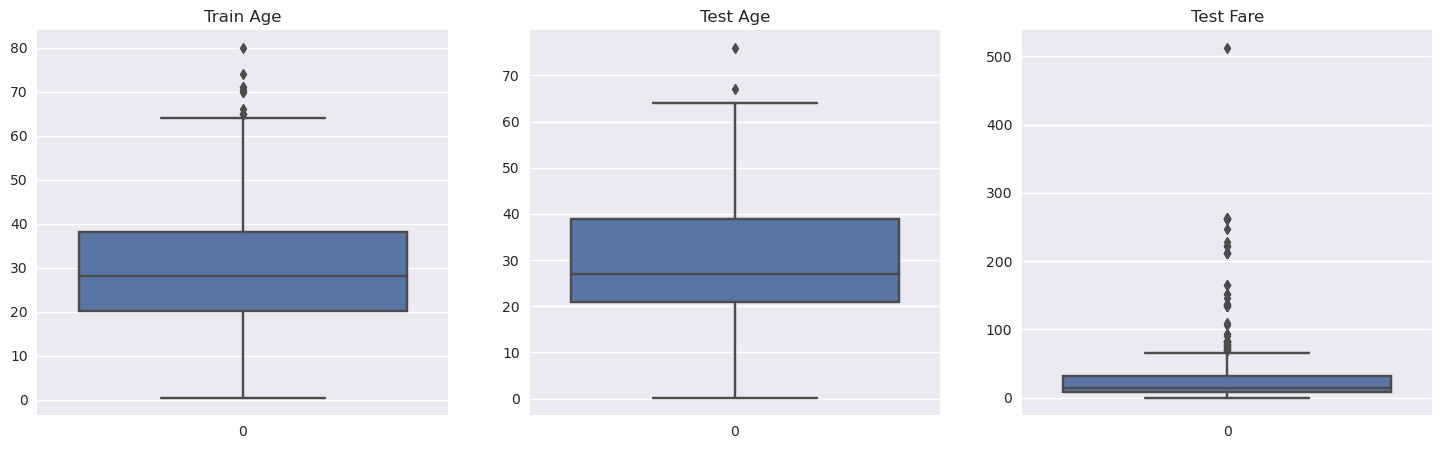

In [14]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(train["Age"]);
plt.title("Train Age")
plt.subplot(1,3,2)
sns.boxplot(test["Age"]);
plt.title("Test Age")
plt.subplot(1,3,3)
sns.boxplot(test["Fare"]);
plt.title("Test Fare")

#### Filling the missing values of Age and Fare

In [15]:
train["Age"].fillna(train["Age"].median(),inplace=True)
test["Age"].fillna(test["Age"].median(),inplace=True)
test["Fare"].fillna(test["Fare"].median(),inplace=True)

In [16]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

- No missing values in the data.

### EDA

####  Survival Percentage

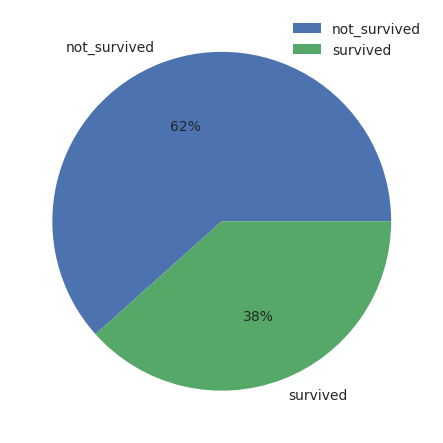

In [18]:
l1=["not_survived","survived"]
l=list(train["Survived"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

- More people died.

#### Passenger Class

Text(0.5, 1.0, 'Test Pclass')

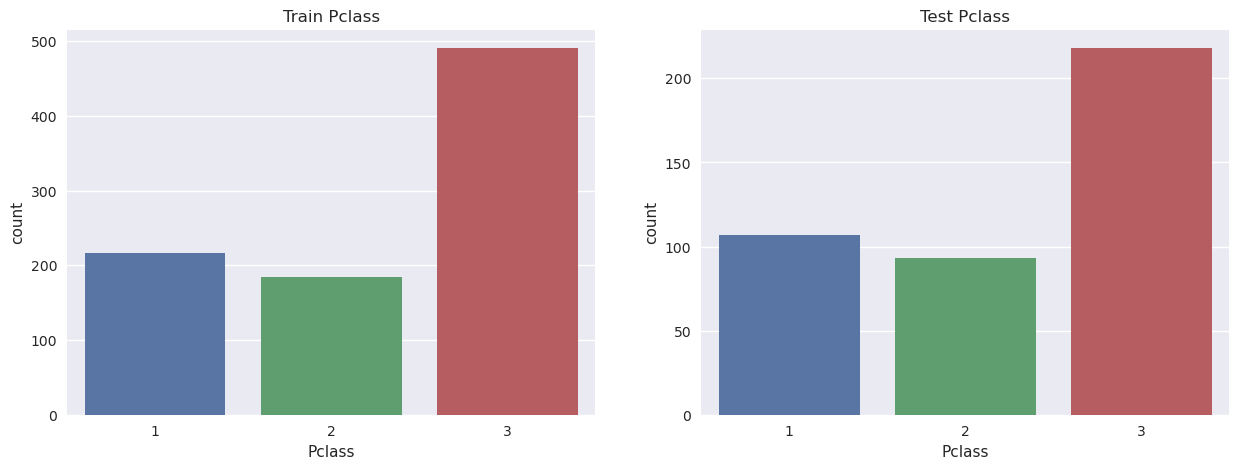

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="Pclass",data=train);
plt.title("Train Pclass")
plt.subplot(1,2,2)
sns.countplot(x="Pclass",data=test);
plt.title("Test Pclass")

- Train : 55% people travelled in 3rd class, 24% travelled in 2nd class and 21% travelled in 1st class.
- Test : 52% people travelled in 3rd class, 22% travelled in 2nd class and 26% travelled in 1st class.
- most people in 3rd class,and least in 2nd class.

#### Feature Engineering

#### Family Members = sibsp + Parch

- for family count, we will add sibsp and parch columns

In [20]:
train["family_members"]=train["Parch"]+train["SibSp"]
print(train.head())
test["family_members"]=test["Parch"]+test["SibSp"]
print(test.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  family_members
0         0       3    male  22.0      1      0   7.2500               1
1         1       1  female  38.0      1      0  71.2833               1
2         1       3  female  26.0      0      0   7.9250               0
3         1       1  female  35.0      1      0  53.1000               1
4         0       3    male  35.0      0      0   8.0500               0
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare  family_members
0          892       3    male  34.5      0      0   7.8292               0
1          893       3  female  47.0      1      0   7.0000               1
2          894       2    male  62.0      0      0   9.6875               0
3          895       3    male  27.0      0      0   8.6625               0
4          896       3  female  22.0      1      1  12.2875               2


In [21]:
train.drop(columns=["SibSp","Parch"],inplace=True)
test.drop(columns=["SibSp","Parch"],inplace=True)

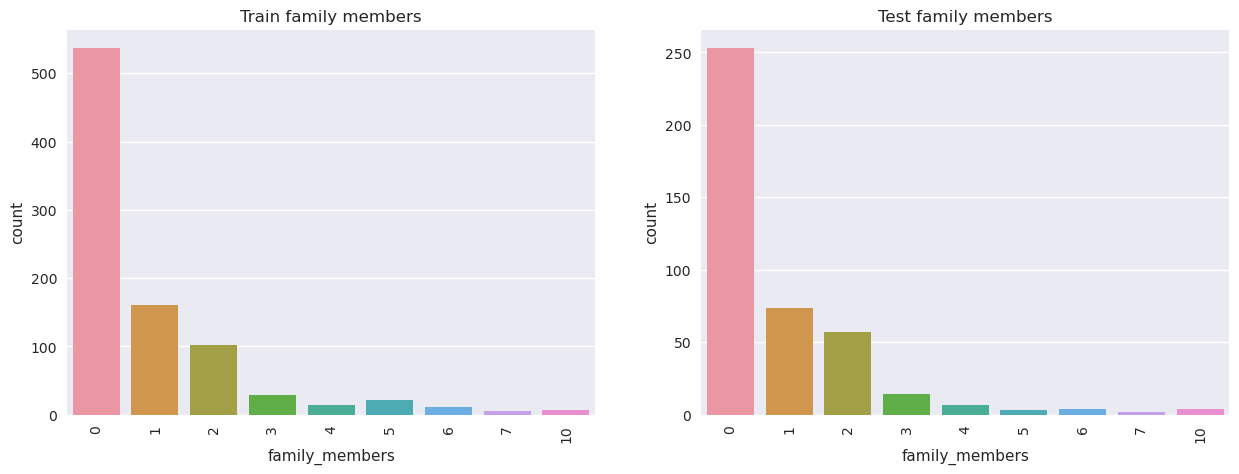

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="family_members",data=train)
plt.xticks(rotation=90)
plt.title("Train family members")
plt.subplot(1,2,2)
sns.countplot(x="family_members",data=test)
plt.xticks(rotation=90)
plt.title("Test family members")
plt.show()

#### Age

Text(0.5, 1.0, 'Test Age')

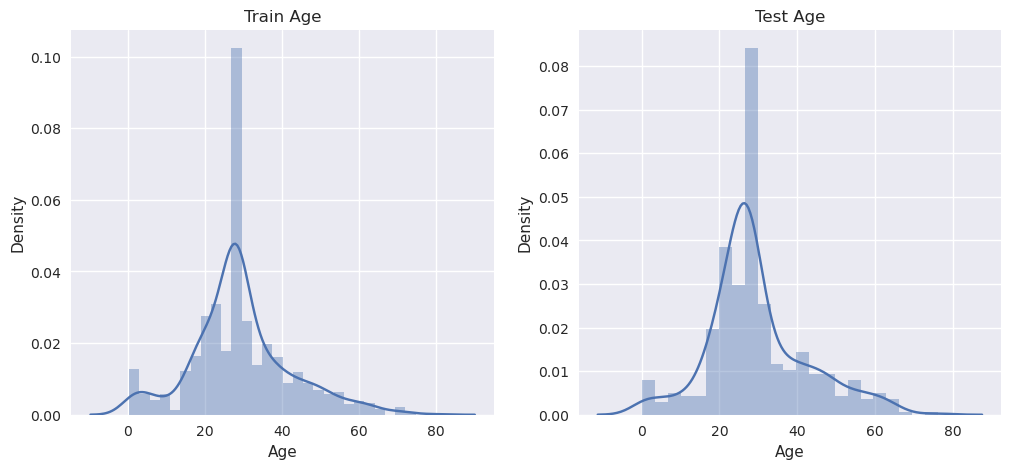

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(train["Age"]);
plt.title("Train Age")
plt.subplot(1,2,2)
sns.distplot(test["Age"]);
plt.title("Test Age")

-  Right skewed distplot implies that mostly travellers were of age 20-40 for both test and train.

#### Binning :column transform from numeric to discrete (discretization)

In [24]:
train["age_category"]=pd.cut(train.Age,[0,14,25,60,np.inf],labels=["children","youth","adults","senior_citizens"])
print("Train--------",train.head())
test["age_category"]=pd.cut(test.Age,[0,14,25,60,np.inf],labels=["children","youth","adults","senior_citizens"])
print("Test--------",test.head())

Train--------    Survived  Pclass     Sex   Age     Fare  family_members age_category
0         0       3    male  22.0   7.2500               1        youth
1         1       1  female  38.0  71.2833               1       adults
2         1       3  female  26.0   7.9250               0       adults
3         1       1  female  35.0  53.1000               1       adults
4         0       3    male  35.0   8.0500               0       adults
Test--------    PassengerId  Pclass     Sex   Age     Fare  family_members     age_category
0          892       3    male  34.5   7.8292               0           adults
1          893       3  female  47.0   7.0000               1           adults
2          894       2    male  62.0   9.6875               0  senior_citizens
3          895       3    male  27.0   8.6625               0           adults
4          896       3  female  22.0  12.2875               2            youth


Text(0.5, 1.0, 'Test Age_Category')

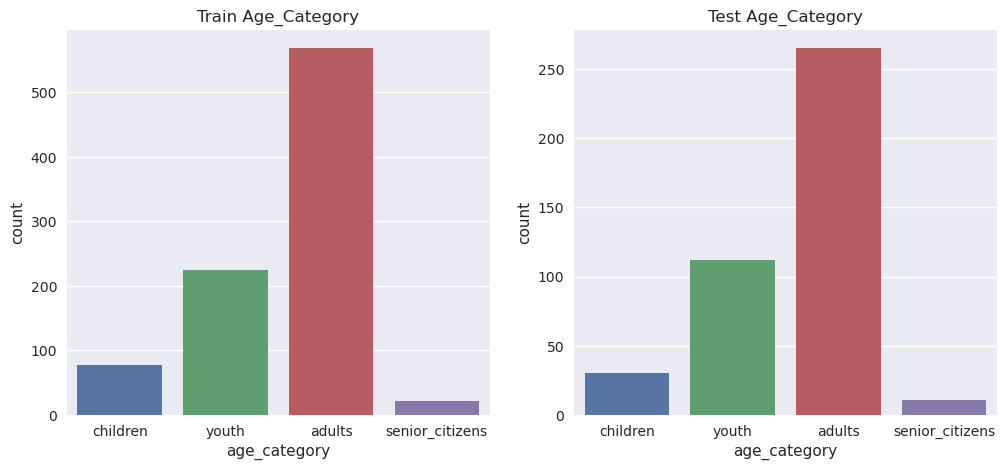

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="age_category",data=train);
plt.title("Train Age_Category")
plt.subplot(1,2,2)
sns.countplot(x="age_category",data=test);
plt.title("Test Age_Category")


- Mostly Travellers were adults in both Train and Test.

#### Sex

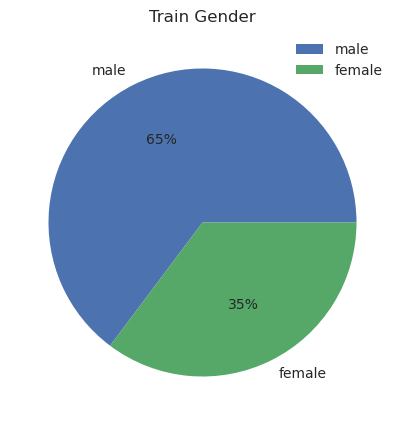

In [26]:
l=list(train["Sex"].value_counts())
l1=["male","female"]
plt.figure(figsize=(15,5))
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.title("Train Gender")
plt.legend()
plt.show();

- Train data has 65% males and 35% female passengers.

#### Fare Distribution

Text(0.5, 1.0, 'Test Fare')

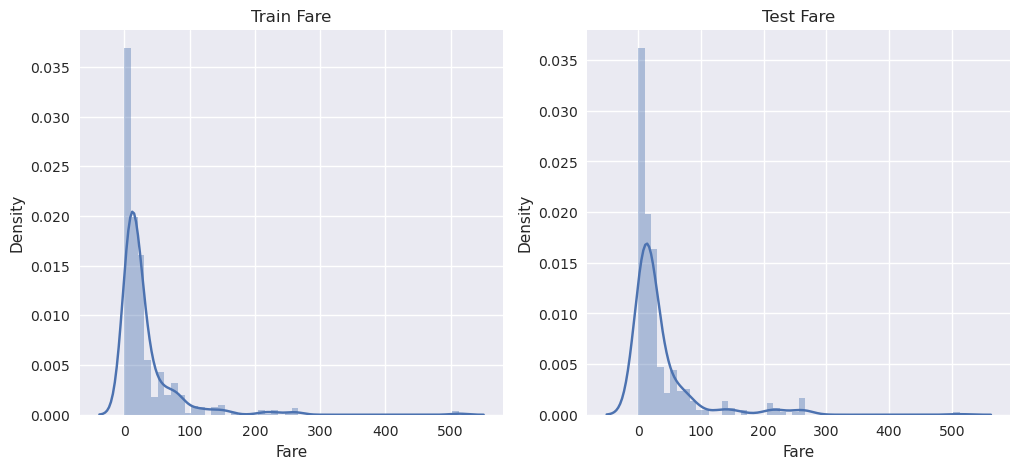

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(train["Fare"]);
plt.title("Train Fare")
plt.subplot(1,2,2)
sns.distplot(test["Fare"]);
plt.title("Test Fare")


- Most of the fare lies in the range 0 to 100 for both train and test data.

#### Binning on fare

In [28]:
train["fare_category"]=pd.cut(train.Fare,[0,20,40,60,80,100,120,np.inf],labels=["0-20","20-40","40-60","60-80","80-100",
                                                                          "100-120","120-500"])
test["fare_category"]=pd.cut(test.Fare,[0,20,40,60,80,100,120,np.inf],labels=["0-20","20-40","40-60","60-80","80-100",
                                                                          "100-120","120-500"])

Text(0.5, 1.0, 'Test fare_Category')

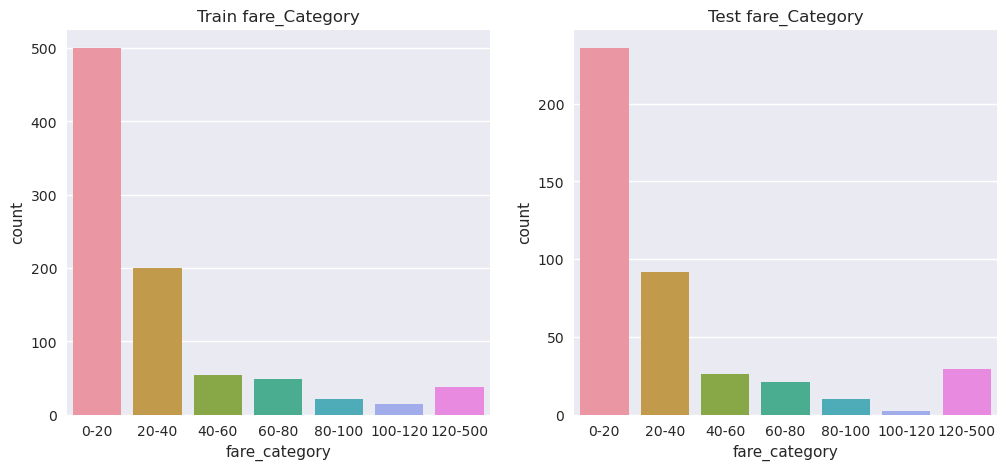

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="fare_category",data=train);
plt.title("Train fare_Category")
plt.subplot(1,2,2)
sns.countplot(x="fare_category",data=test);
plt.title("Test fare_Category")

- Most fares in 0-20 range.
- Least in 100-120 range.

#### EDA on Train Data

#### Average age of passengers of each class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

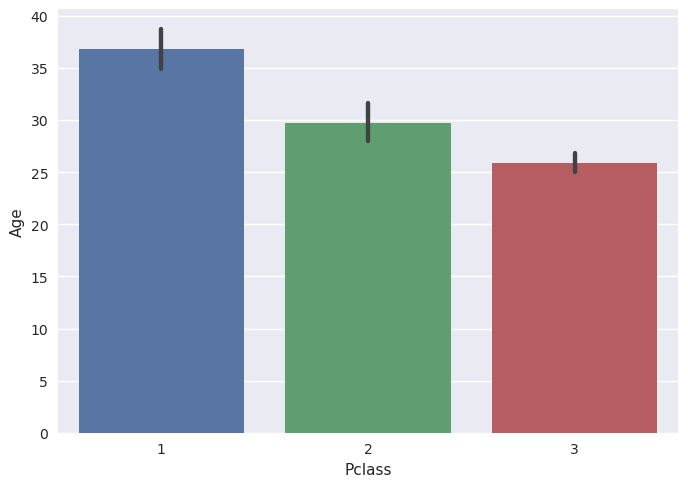

In [30]:
sns.barplot(x=train["Pclass"],y=train["Age"])

- Average age of class 1 is around 37, for class 2 is around 30, and for class 3 is around 26.

#### Avg age of the passengers who survived or not survived

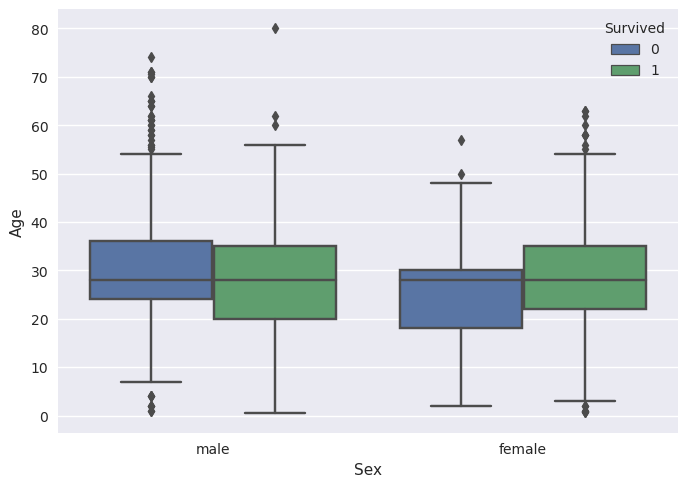

In [31]:
sns.boxplot(x=train["Sex"],y=train["Age"],hue=train["Survived"]);

- Survived Male avg age was 20-35 and survived female avg age was 25-40.

#### comparison of passenger age with respect to survived or not survived

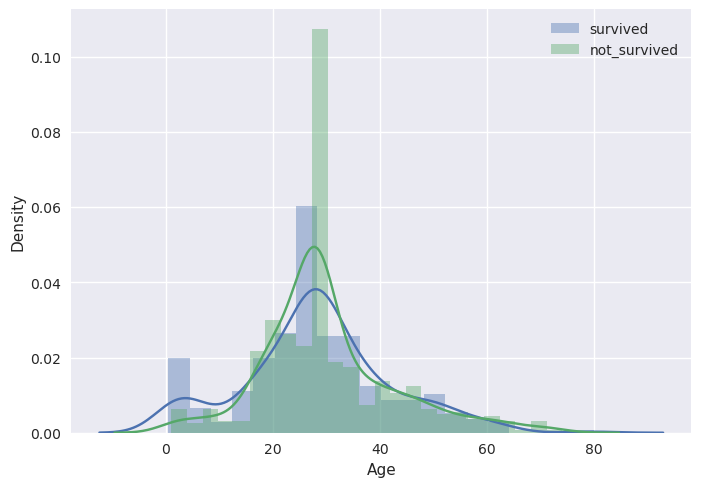

In [32]:
age_surv=train[train["Survived"]==1]["Age"]
age_nsurv=train[train["Survived"]==0]["Age"]
sns.distplot(age_surv,label="survived")
sns.distplot(age_nsurv,label="not_survived")
plt.legend();

- Children have more probability to be alive.
- Young age people died more.

#### Age and Fare

<AxesSubplot:xlabel='Age', ylabel='Fare'>

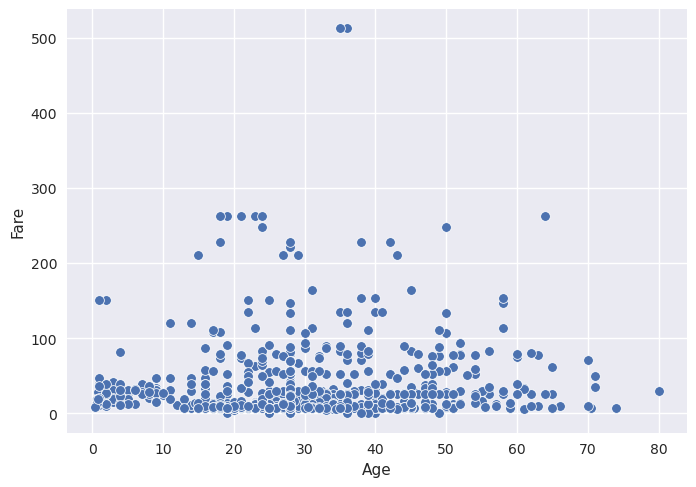

In [33]:
sns.scatterplot(x=train["Age"],y=train["Fare"])

- children fare is constant
- young people fare was more compared to others
- old people had very less fare.


#### Average fare of each pclass

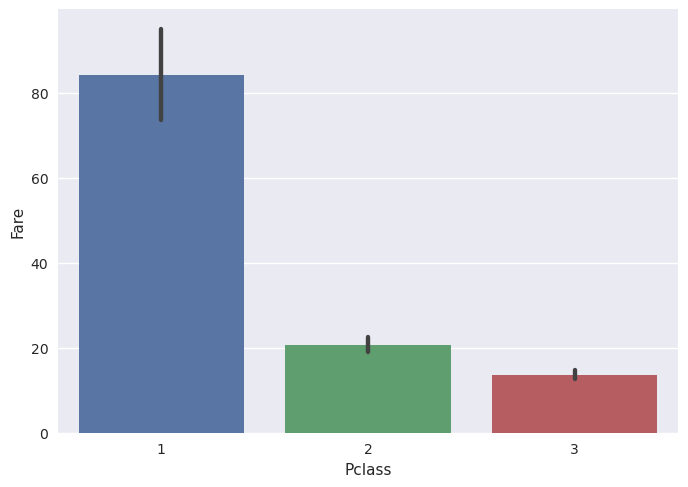

In [34]:
sns.barplot(x=train["Pclass"],y=train["Fare"]);

- Average fare of passenger class 1 is the highest and is above 80
- Average fare of passenger class 2 is the second highest and is around 20
- Average fare of passenger class 3 is the lowest and is around 15


#### Average fare spent by male and female of each class

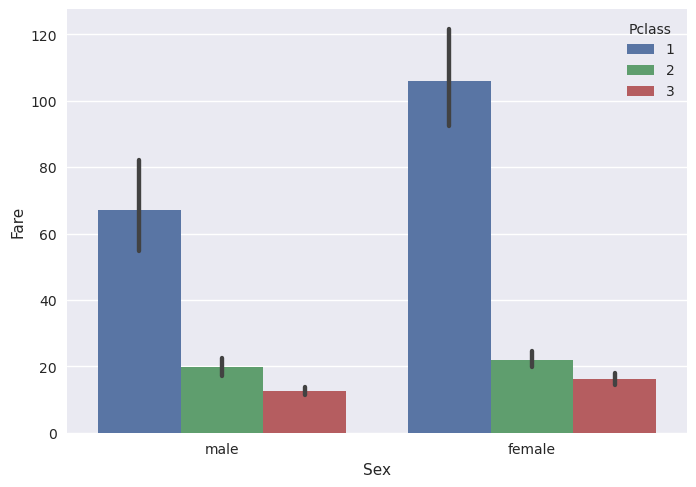

In [35]:
sns.barplot(x=train["Sex"],y=train["Fare"],hue=train["Pclass"]);

- Male class 1 spent around 65, class 2 spent more than 20, class 3 spent less than 20.
- Female class 1 spent around 100, class 2 spent more than 20, class 3 also spent around 20.
- Implies, class 1 females fare was significantly high, whereas classes 2 and 3 had almost similar fares for both males and females

#### Death by Age groups(age_category)

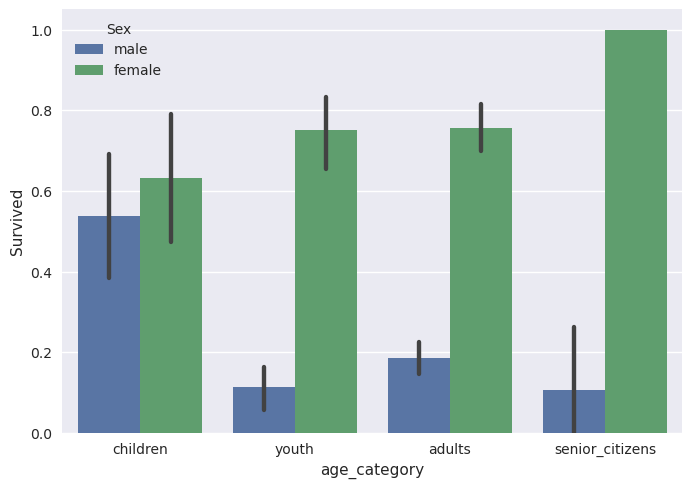

In [36]:
sns.barplot(x=train["age_category"],y=train["Survived"],hue=train["Sex"]);

- Females survived the most for all age categories
- Children survived the most, where more girls survived with a very little margin.
- Young females survived with a very large margin according to males, more than 4 times.
- Adults females survival is also around 80%, and male adults survival is around 20%.
- Senior females survival is almost 100%, and male seniors less than 20%.

#### Minimum, maximum, average fare spent by survival

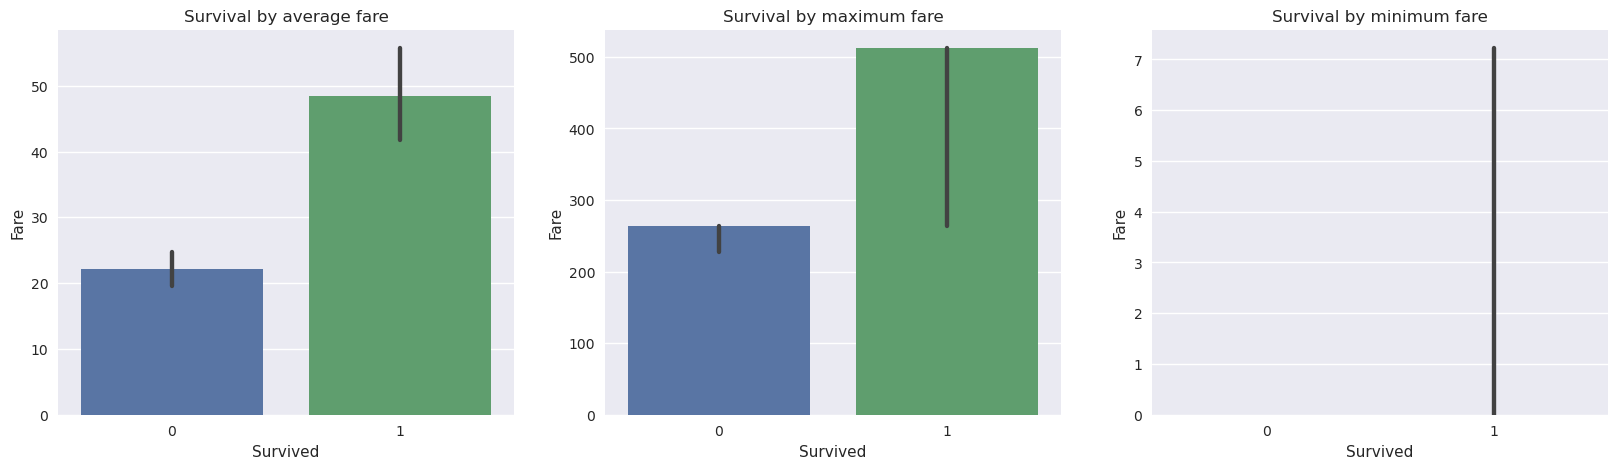

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x=train["Survived"],y=train["Fare"])
plt.title("Survival by average fare")
plt.subplot(1,3,2)
sns.barplot(x=train["Survived"],y=train["Fare"],estimator=max)
plt.title("Survival by maximum fare")
plt.subplot(1,3,3)
sns.barplot(x=train["Survived"],y=train["Fare"],estimator=min)
plt.title("Survival by minimum fare")
plt.show();

- Around 50 is the average fare of people survived, and around 20 is the average fare of not survived.
- Around 500 is the maximum fare of people survived, and around 280 is the maximum fare of not survived.
- 0 is the minimum fare of people survived and not survived.

#### Males or females survival of each class

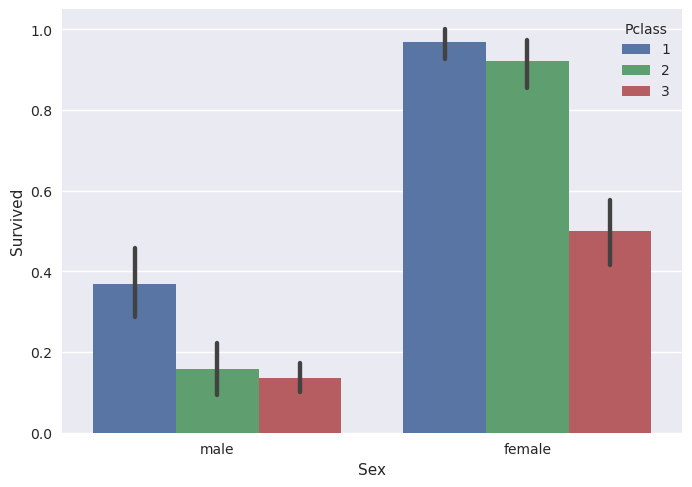

In [38]:
sns.barplot(x=train["Sex"],y=train["Survived"],hue=train["Pclass"]);

- For both males and females pattern is same as class survival.
- However, it is clear that males of 2nd and 3rd class survived much less than of class 1.
- Whereas, for females there is not much difference for class 1 and 2, but very less class 3 females survived.

#### Handling Outliers

##### Checking outliers using boxplot

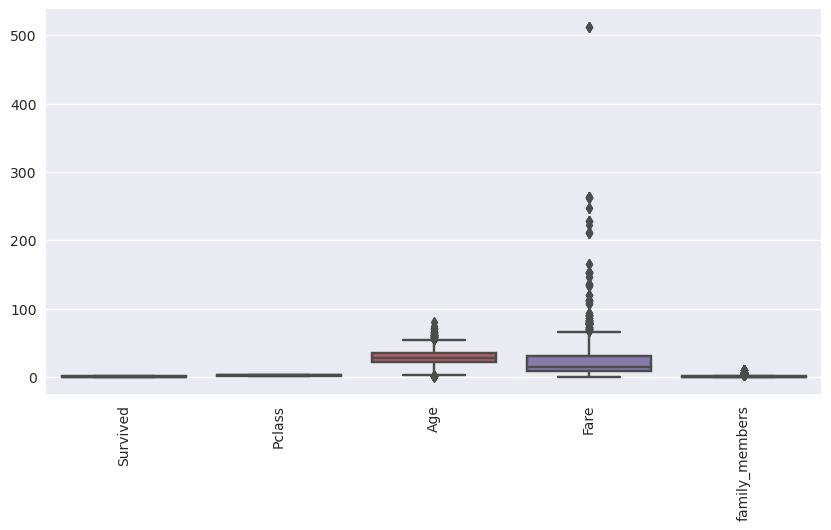

In [39]:
plt.figure(figsize=(10,5),facecolor='white')
sns.boxplot(data=train)
plt.xticks(rotation=90);

- Removing outliers for age and fare columns.

IQR upper limit for column Age: 54
IQR lower limit for column Age: 2
Outliers on right side in Age is:
 11     58.0
15     55.0
33     66.0
54     65.0
94     59.0
96     71.0
116    70.5
152    55.5
170    61.0
174    56.0
195    58.0
232    59.0
252    62.0
268    58.0
275    63.0
280    65.0
326    61.0
366    60.0
438    64.0
456    65.0
467    56.0
483    63.0
487    58.0
492    55.0
493    71.0
545    64.0
555    62.0
570    62.0
587    60.0
625    61.0
626    57.0
630    80.0
647    56.0
659    58.0
672    70.0
684    60.0
694    60.0
745    70.0
772    57.0
829    62.0
851    74.0
879    56.0
Name: Age, dtype: float64
Outliers on left side in Age is: 
 78     0.83
164    1.00
172    1.00
183    1.00
305    0.92
381    1.00
386    1.00
469    0.75
644    0.75
755    0.67
788    1.00
803    0.42
827    1.00
831    0.83
Name: Age, dtype: float64


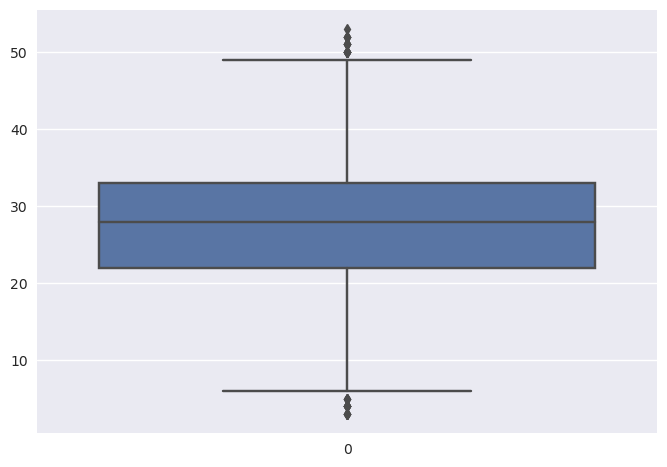

In [40]:
q3=train["Age"].quantile(q=0.75)
q1=train["Age"].quantile(q=0.25)
IQR=q3-q1
# Deriving bounderies of outliers, inter quartile upper and lower limits
IQR_l_limit=int(q1-1.5*IQR)
IQR_u_limit=int(q3+1.5*IQR)
print("IQR upper limit for column Age:",IQR_u_limit)
print("IQR lower limit for column Age:",IQR_l_limit)
# finding and treating outliers forboth lower and upper end
k1=train[train["Age"]>IQR_u_limit]
k2=train[train["Age"]<IQR_l_limit]
print("Outliers on right side in Age is:\n",k1["Age"])
print("Outliers on left side in Age is:","\n",k2["Age"])
train1=train[(train["Age"]<IQR_u_limit)&(train["Age"]>IQR_l_limit)]
sns.boxplot(train1["Age"]);

IQR upper limit for column Fare: 63
IQR lower limit for column Fare: -25
outliers on right side in Fare is: 
 1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
835     83.1583
846     69.5500
849     89.1042
856    164.8667
863     69.5500
Name: Fare, Length: 105, dtype: float64


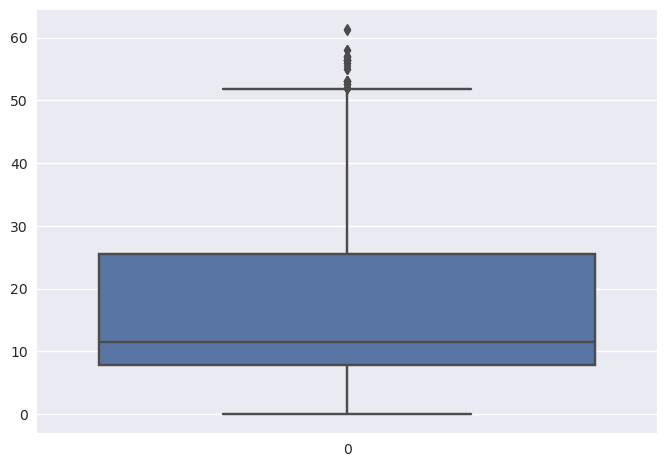

In [41]:
q3=train1["Fare"].quantile(q=0.75)
q1=train1["Fare"].quantile(q=0.25)
IQR=q3-q1

IQR_l_limit=int(q1-1.5*IQR)
IQR_u_limit=int(q3+1.5*IQR)
print("IQR upper limit for column Fare:",IQR_u_limit)
print("IQR lower limit for column Fare:",IQR_l_limit)

k1=train1[train1["Fare"]>IQR_u_limit]
print("outliers on right side in Fare is:","\n",k1["Fare"])
train1=train1[train1["Fare"]<IQR_u_limit]
sns.boxplot(train1["Fare"]);

In [42]:
train1.shape

(712, 8)

- It is clear that shape of train data is reduced.

#### Feature Selection :
- Correlation

- Multicollinearity

#### Correlation

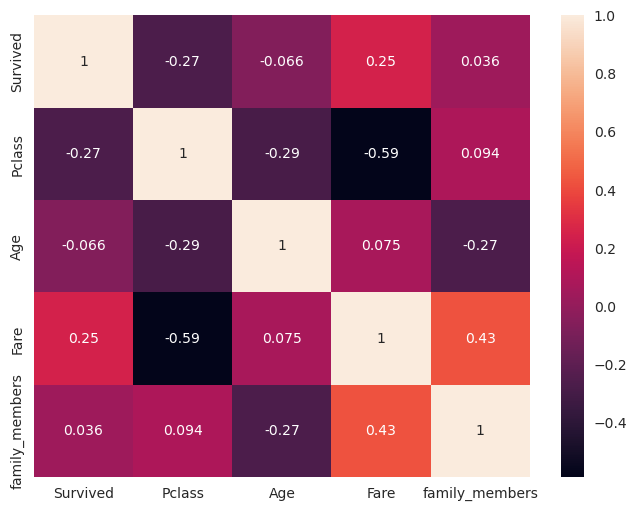

In [43]:
plt.figure(figsize=(8,6))
corr=train1.corr()
sns.heatmap(corr,annot=True);

- As not all the features are highly correlated with target i.e survived so we consider all features for prediction.

#### Checking multicollinearity in the features
#### For multicollinearity we need to do scaling first on features so seggregate features and target as follows

#### Label encoding of categorical data columns

In [44]:
train1.select_dtypes(include='object')

,Sex
0,male
2,female
3,female
4,male
5,male
...,...
886,male
887,female
888,female
889,male


In [45]:
print(train1["Sex"].unique())
train1["Sex"].replace({"male":0,"female":1},inplace=True)  ## label encoding

['male' 'female']


In [46]:
test.select_dtypes(include='object')

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


In [47]:
print(test["Sex"].unique())
test["Sex"].replace({"male":0,"female":1},inplace=True)  

['male' 'female']


#### Seggregating features and target and dropping irrelevant columns

In [48]:
train1.drop(columns=["age_category","fare_category"],inplace=True)

In [49]:
x=train1.drop(columns=["Survived"])
x ## features

,Pclass,Sex,Age,Fare,family_members
0,3,0,22.0,7.2500,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
5,3,0,28.0,8.4583,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,0
888,3,1,28.0,23.4500,3
889,1,0,26.0,30.0000,0


In [50]:
y=train1["Survived"]
y ## target

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 712, dtype: int64

#### Scaling of features


In [51]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.67390242, -0.68413539, -0.60055718, -0.74741446,  0.19828043],
       [ 0.67390242,  1.46169897, -0.19068734, -0.6959702 , -0.5331997 ],
       [-2.13205385,  1.46169897,  0.7315198 ,  2.74698468,  0.19828043],
       ...,
       [ 0.67390242,  1.46169897,  0.01424758,  0.48724783,  1.66124068],
       [-2.13205385, -0.68413539, -0.19068734,  0.98644771, -0.5331997 ],
       [ 0.67390242, -0.68413539,  0.42411742, -0.7093076 , -0.5331997 ]])

#### Computing VIF for detecting multicollinearity

In [52]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) 
for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns


vif 

,vif,Features
0,2.032571,Pclass
1,1.081129,Sex
2,1.170073,Age
3,2.379379,Fare
4,1.719988,family_members


- Vif of all features are less than 5 so we consider all features as relavant features for modelling
- Building Prediction Model using Logistic Regression
- Dividing the Data as 80% for training and 20% for test data as follows :

In [53]:
X=x_scaled
Y=y
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.20, random_state = 1830)

#### Checking shape of train and test data


In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(569, 5)
(569,)
(143, 5)
(143,)


#### Model building using logistic regression


In [55]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

#### Checking for imbalanced data but it does not matter to logistic, it is robust.¶
- We will not rely on accuracy if imbalanced data

In [56]:
print(train1["Survived"].value_counts())

0    474
1    238
Name: Survived, dtype: int64


- Not imbalanced Data
- Can rely on accuracy for this model

#### Model Evaluation


##### Predict x-test

In [57]:
y_pred=lr.predict(x_test)

#### Plot Confusion Matrix

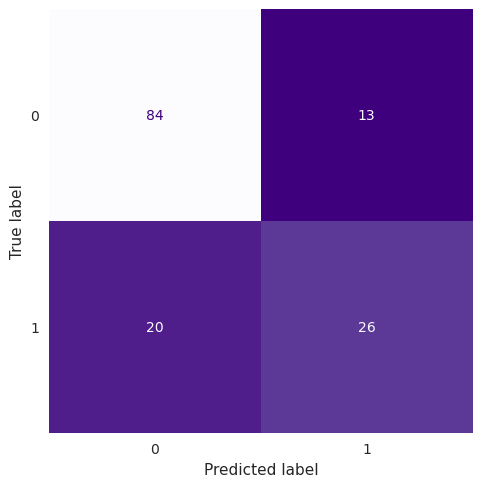

In [58]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

#### Classification_report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        97
           1       0.67      0.57      0.61        46

    accuracy                           0.77       143
   macro avg       0.74      0.72      0.72       143
weighted avg       0.76      0.77      0.76       143



#### Calculate Performance Metrics

In [60]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

#### Base Model Performance Metrics:

In [61]:
result = metrics_calculator(y_test, y_pred, 'Base Logistic')
result

,Base Logistic
Accuracy,0.769231
Precision,0.737179
Recall,0.715598
F1-score,0.723793


#### ROC/AUC

In [62]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7155983863738233

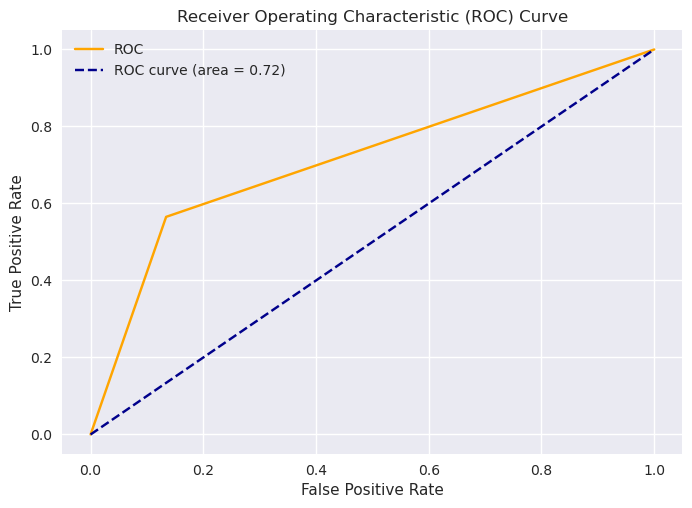

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### MODEL EVALUATION SUMMARY :

- Model accuracy : 0.75

- AUC- 0.70

- precision : 0.80

- Recall : 0.85

- F1 score : 0.82

#### Conclusion :
Here, I used Logistic regression algorithm for prediction and got 75.52% accuracy and 0.82 f1 score and 0.70 AUC

#### Future scope :

Do implement other classification Machine learning algorithms to get best accuracy and AUC score by comparing their evaluation metrics.

#### PART 2 : PREDICTION ON TEST DATA

#### Seggregating the features of test Data

#### Dropping irrelevant columns

In [64]:
test.drop(columns=["age_category","fare_category"],inplace=True)

In [65]:
features_test=test.drop(columns=["PassengerId"])
features_test.shape

(418, 5)

In [66]:
passenger_id=test["PassengerId"]
passenger_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

#### Checking shape of training and test data

In [67]:
X # training data : features(in scaled form)

array([[ 0.67390242, -0.68413539, -0.60055718, -0.74741446,  0.19828043],
       [ 0.67390242,  1.46169897, -0.19068734, -0.6959702 , -0.5331997 ],
       [-2.13205385,  1.46169897,  0.7315198 ,  2.74698468,  0.19828043],
       ...,
       [ 0.67390242,  1.46169897,  0.01424758,  0.48724783,  1.66124068],
       [-2.13205385, -0.68413539, -0.19068734,  0.98644771, -0.5331997 ],
       [ 0.67390242, -0.68413539,  0.42411742, -0.7093076 , -0.5331997 ]])

In [68]:
Y ## Training data : target

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [69]:
print(X.shape)  ### X : training data : features
print(Y.shape)  ### Y:  training data : target
print(features_test.shape)  ### test data : features

(712, 5)
(712,)
(418, 5)


#### Modelling using logistic regression algorithm

In [70]:
log_reg_test = LogisticRegression()

log_reg_test.fit(X,Y)

LogisticRegression()

#### Predicting values for test data

#### Scaling of features_test

In [71]:
scalar = StandardScaler()
features_test_scaled = scalar.fit_transform(features_test)
features_test_scaled

array([[ 0.87348191, -0.75592895,  0.38623105, -0.49741333, -0.5534426 ],
       [ 0.87348191,  1.32287566,  1.37137004, -0.51227801,  0.10564289],
       [-0.31581919, -0.75592895,  2.55353683, -0.46410047, -0.5534426 ],
       ...,
       [ 0.87348191, -0.75592895,  0.70147553, -0.50779638, -0.5534426 ],
       [ 0.87348191, -0.75592895, -0.20485235, -0.49345515, -0.5534426 ],
       [ 0.87348191, -0.75592895, -0.20485235, -0.23695704,  0.76472838]])

#### Prediction of test data

In [72]:
test_pred = log_reg_test.predict(features_test_scaled)
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### Creating prediction Dataframe which contains passengerid and prediction of test data and write it as Survived_prediction_Rupanshi.csv

In [73]:
d = {'PassengerId': passenger_id, 'Survived': test_pred} 
     
prediction_df = pd.DataFrame(d)
prediction_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### Saving the dataframe to Survived_prediction_Rupanshi.csv file.

In [74]:
prediction_df.to_csv('submission.csv',index=False)